In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test_x.csv")

In [3]:
split_point = train.shape[0]
data = pd.concat([train.drop('voted',axis=1),test],ignore_index=True)

In [7]:
existing_word_cols = ['wr_'+'0'*(2-len(str(i)))+str(i) for i in range(1,14)]
not_existing_word_cols = ['wf_'+'0'*(2-len(str(i)))+str(i) for i in range(1,4)]
vocab_wf_cols=data[not_existing_word_cols].copy()
vocab_wr_cols=data[existing_word_cols].copy()

In [8]:
vocab_wf_cols

,wf_01,wf_02,wf_03
0,0,0,0
1,0,0,0
2,0,0,1
3,0,0,0
4,0,1,0
...,...,...,...
56910,0,0,0
56911,0,1,1
56912,0,1,1
56913,0,0,0


In [10]:
vocab_wf_cols['wf_sum']=vocab_wf_cols.sum(axis=1)

In [13]:
vocab_wf_cols['wf_sum'].value_counts()

0    41976
1    10553
2     3085
3     1301
Name: wf_sum, dtype: int64

In [14]:
vocab_wf_cols

,wf_01,wf_02,wf_03,wf_sum
0,0,0,0,0
1,0,0,0,0
2,0,0,1,1
3,0,0,0,0
4,0,1,0,1
...,...,...,...,...
56910,0,0,0,0
56911,0,1,1,2
56912,0,1,1,2
56913,0,0,0,0


In [9]:
vocab_wr_cols

,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,1,0,0,1,0,1,1,0,1,0,1,1
1,0,1,0,1,1,0,1,1,0,1,0,1,1
2,1,1,0,1,1,0,1,1,1,1,0,1,1
3,0,1,0,0,0,0,0,1,0,1,0,1,1
4,1,1,0,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56910,1,1,0,1,1,0,1,1,0,1,0,1,1
56911,1,1,1,1,1,1,1,1,1,1,1,1,1
56912,1,1,1,1,1,0,1,1,0,1,0,1,1
56913,1,1,0,1,0,0,1,1,0,1,1,1,0


In [15]:
vocab_wr_cols['wr_sum']=vocab_wr_cols.sum(axis=1)

In [16]:
vocab_wr_cols['wr_sum'].value_counts()

9     13337
10    11248
11     7739
8      7115
12     4854
13     3825
7      3333
6      1806
5      1012
4       781
3       581
2       475
1       422
0       387
Name: wr_sum, dtype: int64

In [17]:
vocab_wr_cols

,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,wr_sum
0,0,1,0,0,1,0,1,1,0,1,0,1,1,7
1,0,1,0,1,1,0,1,1,0,1,0,1,1,8
2,1,1,0,1,1,0,1,1,1,1,0,1,1,10
3,0,1,0,0,0,0,0,1,0,1,0,1,1,5
4,1,1,0,1,1,1,1,1,0,1,1,1,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56910,1,1,0,1,1,0,1,1,0,1,0,1,1,9
56911,1,1,1,1,1,1,1,1,1,1,1,1,1,13
56912,1,1,1,1,1,0,1,1,0,1,0,1,1,10
56913,1,1,0,1,0,0,1,1,0,1,1,1,0,8


In [55]:
data=pd.read_csv("data.csv")

In [60]:
new_data=pd.concat([data, vocab_wf_cols['wf_sum'], vocab_wr_cols['wr_sum']], axis=1)
new_data

,Unnamed: 0,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,wf_sum,wr_sum
0,0.0,3.0,363.0,4.0,1370.0,5.0,997.0,1.0,1024.0,2.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0,7
1,1.0,5.0,647.0,5.0,1313.0,3.0,3387.0,5.0,2969.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0,8
2,2.0,4.0,1623.0,1.0,1480.0,1.0,1021.0,4.0,3374.0,5.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1,10
3,3.0,3.0,504.0,3.0,2311.0,4.0,992.0,3.0,3245.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0,5
4,4.0,1.0,927.0,1.0,707.0,5.0,556.0,2.0,1062.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56910,56913.0,2.0,539.0,1.0,2090.0,2.0,4642.0,1.0,673.0,2.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0,9
56911,56914.0,2.0,541.0,4.0,900.0,5.0,691.0,2.0,1951.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2,13
56912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,10
56913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,8


In [77]:
new_data.groupby(['wf_sum', 'wr_sum'])['age_group'].value_counts().unstack()

age_group      +70s     10s     20s     30s     40s    50s    60s
wf_sum wr_sum                                                    
0      0        2.0   122.0   108.0    48.0    47.0   30.0    6.0
       1        4.0   138.0    98.0    54.0    46.0   33.0    8.0
       2        1.0   118.0   142.0    67.0    46.0   25.0   17.0
       3        NaN   138.0   137.0    89.0    59.0   33.0   13.0
       4        1.0   217.0   205.0   116.0    62.0   46.0   14.0
       5        6.0   276.0   272.0   159.0   104.0   65.0   20.0
       6       10.0   511.0   530.0   281.0   189.0  106.0   50.0
       7       15.0   986.0   942.0   539.0   332.0  181.0   79.0
       8       30.0  1926.0  1910.0  1016.0   694.0  376.0  183.0
       9       57.0  3243.0  3324.0  1853.0  1233.0  653.0  273.0
       10      43.0  2363.0  2467.0  1384.0   815.0  521.0  202.0
       11      30.0  1431.0  1485.0   786.0   489.0  275.0  131.0
       12      22.0   854.0   811.0   464.0   298.0  189.0   67.0
       13      11.0   690.0   626.0   369.0   237.0  144.0   56.0
1      0        NaN     4.0     2.0     1.0     1.0    NaN    NaN
       1        NaN     5.0     6.0     7.0     2.0    NaN    NaN
       2        NaN    12.0    12.0     6.0     3.0    1.0    NaN
       3        NaN    18.0    27.0     9.0     5.0    2.0    2.0
       4        NaN    17.0    20.0     9.0     9.0    5.0    1.0
       5        NaN    28.0    26.0    12.0     3.0    2.0    3.0
       6        NaN    36.0    36.0    24.0     6.0    3.0    NaN
       7        3.0    68.0    65.0    42.0    30.0   13.0    5.0
       8        2.0   258.0   262.0   149.0    90.0   54.0   20.0
       9       13.0   731.0   675.0   370.0   254.0  132.0   55.0
       10       7.0   860.0   806.0   432.0   286.0  157.0   68.0
       11      16.0   697.0   662.0   353.0   222.0  109.0   52.0
       12       4.0   422.0   409.0   251.0   162.0   90.0   25.0
       13       3.0   253.0   263.0   134.0    82.0   48.0   24.0
2      0        NaN     2.0     NaN     1.0     2.0    NaN    NaN
       1        NaN     1.0     5.0     2.0     1.0    NaN    NaN
       2        NaN     7.0     4.0     1.0     2.0    NaN    NaN
       3        NaN     6.0     5.0     3.0     4.0    1.0    1.0
       4        NaN     7.0     7.0     4.0     3.0    2.0    3.0
       5        1.0     4.0     6.0     2.0     5.0    2.0    NaN
       6        NaN     8.0     4.0     3.0     1.0    5.0    NaN
       7        1.0    13.0    10.0     1.0     1.0    2.0    1.0
       8        2.0    42.0    36.0    26.0    17.0    3.0    2.0
       9        2.0   138.0   138.0    74.0    41.0   28.0   13.0
       10       6.0   227.0   220.0   130.0    68.0   38.0   25.0
       11       4.0   235.0   240.0   124.0   107.0   56.0   18.0
       12       3.0   201.0   163.0    81.0    69.0   35.0   14.0
       13       2.0    90.0    96.0    60.0    38.0   25.0    3.0
3      0        NaN     2.0     4.0     NaN     1.0    2.0    2.0
       1        NaN     4.0     4.0     2.0     1.0    NaN    1.0
       2        NaN     3.0     2.0     3.0     2.0    1.0    NaN
       3        NaN    10.0    10.0     3.0     2.0    3.0    NaN
       4        NaN    12.0     8.0     6.0     4.0    3.0    NaN
       5        NaN     8.0     3.0     3.0     2.0    NaN    NaN
       6        NaN     1.0     1.0     NaN     1.0    NaN    NaN
       7        NaN     2.0     1.0     1.0     NaN    NaN    NaN
       8        NaN     7.0     4.0     3.0     1.0    1.0    NaN
       9        NaN    14.0     7.0     6.0     6.0    4.0    NaN
       10       NaN    40.0    35.0    23.0     9.0   10.0    5.0
       11       1.0    69.0    74.0    29.0    25.0   15.0    4.0
       12       1.0    61.0    69.0    44.0    22.0   19.0    4.0
       13       3.0   180.0   177.0   101.0    67.0   33.0   10.0

In [76]:
new_data.groupby(['wf_sum', 'wr_sum'])['education'].value_counts().unstack()

education         1.0     2.0     3.0     4.0
wf_sum wr_sum                                
0      0         42.0   150.0   111.0    60.0
       1         52.0   147.0   111.0    71.0
       2         34.0   167.0   145.0    70.0
       3         45.0   170.0   176.0    78.0
       4         84.0   271.0   205.0   101.0
       5         97.0   358.0   303.0   144.0
       6        200.0   605.0   593.0   279.0
       7        353.0  1119.0  1053.0   549.0
       8        676.0  2383.0  2025.0  1051.0
       9       1148.0  3979.0  3655.0  1854.0
       10       844.0  2828.0  2670.0  1453.0
       11       521.0  1765.0  1533.0   808.0
       12       322.0   972.0   930.0   481.0
       13       242.0   801.0   710.0   380.0
1      0          3.0     3.0     1.0     1.0
       1          1.0    10.0     7.0     2.0
       2          4.0    15.0     8.0     7.0
       3          6.0    28.0    20.0     9.0
       4          4.0    28.0    22.0     7.0
       5          5.0    33.0    21.0    15.0
       6         17.0    38.0    29.0    21.0
       7         24.0    73.0    82.0    47.0
       8         89.0   312.0   280.0   154.0
       9        277.0   839.0   727.0   387.0
       10       312.0   969.0   898.0   437.0
       11       239.0   803.0   719.0   350.0
       12       144.0   520.0   468.0   231.0
       13        94.0   292.0   278.0   143.0
2      0          NaN     4.0     1.0     NaN
       1          1.0     3.0     3.0     2.0
       2          NaN    10.0     2.0     2.0
       3          3.0     8.0     7.0     2.0
       4          4.0     7.0    11.0     4.0
       5          3.0     4.0    10.0     3.0
       6          2.0     9.0     6.0     4.0
       7          5.0     9.0     8.0     7.0
       8         19.0    48.0    37.0    24.0
       9         56.0   160.0   134.0    84.0
       10        91.0   243.0   253.0   127.0
       11       100.0   262.0   284.0   138.0
       12        61.0   224.0   202.0    79.0
       13        34.0   119.0   110.0    51.0
3      0          1.0     5.0     4.0     1.0
       1          NaN     4.0     5.0     3.0
       2          1.0     5.0     5.0     NaN
       3          8.0     4.0    10.0     6.0
       4          3.0    10.0    13.0     7.0
       5          3.0     8.0     2.0     3.0
       6          NaN     2.0     NaN     1.0
       7          1.0     2.0     1.0     NaN
       8          2.0     8.0     4.0     2.0
       9          2.0    15.0    15.0     5.0
       10         9.0    51.0    38.0    24.0
       11        25.0    70.0    75.0    47.0
       12        26.0    75.0    88.0    31.0
       13        60.0   233.0   184.0    94.0

In [78]:
new_data.groupby(['wf_sum', 'wr_sum'])['hand'].value_counts().unstack()

hand              1.0     2.0    3.0
wf_sum wr_sum                       
0      0        310.0    40.0   13.0
       1        320.0    51.0   10.0
       2        360.0    41.0   15.0
       3        404.0    47.0   18.0
       4        573.0    63.0   25.0
       5        770.0   102.0   30.0
       6       1445.0   177.0   55.0
       7       2651.0   312.0  111.0
       8       5299.0   615.0  221.0
       9       9207.0  1052.0  377.0
       10      6721.0   795.0  279.0
       11      3968.0   503.0  156.0
       12      2330.0   284.0   91.0
       13      1841.0   224.0   68.0
1      0          5.0     3.0    NaN
       1         18.0     1.0    1.0
       2         29.0     4.0    1.0
       3         54.0     7.0    2.0
       4         53.0     5.0    3.0
       5         65.0     6.0    3.0
       6         88.0    13.0    4.0
       7        192.0    26.0    8.0
       8        727.0    80.0   28.0
       9       1916.0   231.0   83.0
       10      2227.0   285.0  104.0
       11      1811.0   233.0   67.0
       12      1169.0   151.0   43.0
       13       697.0    87.0   23.0
2      0          5.0     NaN    NaN
       1          7.0     2.0    NaN
       2         14.0     NaN    NaN
       3         17.0     3.0    NaN
       4         23.0     2.0    1.0
       5         17.0     2.0    1.0
       6         20.0     1.0    NaN
       7         22.0     4.0    3.0
       8        109.0    11.0    8.0
       9        380.0    44.0   10.0
       10       613.0    77.0   24.0
       11       679.0    77.0   28.0
       12       481.0    58.0   27.0
       13       274.0    29.0   11.0
3      0         11.0     NaN    NaN
       1         11.0     1.0    NaN
       2         11.0     NaN    NaN
       3         26.0     2.0    NaN
       4         29.0     3.0    1.0
       5         15.0     1.0    NaN
       6          3.0     NaN    NaN
       7          4.0     NaN    NaN
       8         11.0     3.0    2.0
       9         33.0     3.0    1.0
       10       107.0    12.0    3.0
       11       188.0    20.0    9.0
       12       192.0    20.0    8.0
       13       490.0    60.0   21.0

In [79]:
new_data.groupby(['wf_sum', 'wr_sum'])['married'].value_counts().unstack()

married           1.0     2.0    3.0
wf_sum wr_sum                       
0      0        260.0    77.0   26.0
       1        259.0    85.0   37.0
       2        290.0    96.0   30.0
       3        310.0   110.0   49.0
       4        470.0   142.0   49.0
       5        638.0   180.0   84.0
       6       1151.0   356.0  170.0
       7       2129.0   673.0  272.0
       8       4247.0  1362.0  526.0
       9       7374.0  2360.0  902.0
       10      5388.0  1750.0  657.0
       11      3245.0  1008.0  374.0
       12      1888.0   612.0  205.0
       13      1460.0   487.0  186.0
1      0          7.0     1.0    NaN
       1         14.0     6.0    NaN
       2         28.0     4.0    2.0
       3         46.0    14.0    3.0
       4         43.0    13.0    5.0
       5         56.0    13.0    5.0
       6         78.0    20.0    7.0
       7        162.0    48.0   16.0
       8        581.0   177.0   77.0
       9       1577.0   437.0  216.0
       10      1863.0   554.0  199.0
       11      1461.0   493.0  157.0
       12       934.0   309.0  120.0
       13       562.0   176.0   69.0
2      0          2.0     1.0    2.0
       1          8.0     1.0    NaN
       2         10.0     4.0    NaN
       3         12.0     7.0    1.0
       4         16.0     7.0    3.0
       5         13.0     5.0    2.0
       6         13.0     8.0    NaN
       7         20.0     5.0    4.0
       8         88.0    28.0   12.0
       9        293.0   116.0   25.0
       10       502.0   159.0   53.0
       11       531.0   183.0   70.0
       12       401.0   118.0   47.0
       13       210.0    75.0   29.0
3      0          7.0     4.0    NaN
       1          6.0     5.0    1.0
       2          6.0     3.0    2.0
       3         20.0     6.0    2.0
       4         23.0     7.0    3.0
       5         12.0     3.0    1.0
       6          2.0     1.0    NaN
       7          4.0     NaN    NaN
       8         13.0     2.0    1.0
       9         24.0     9.0    4.0
       10        85.0    30.0    7.0
       11       159.0    47.0   11.0
       12       157.0    46.0   17.0
       13       405.0   119.0   47.0

In [80]:
new_data.groupby(['wf_sum', 'wr_sum'])['urban'].value_counts().unstack()

urban             1.0     2.0     3.0
wf_sum wr_sum                        
0      0         69.0   156.0   138.0
       1         72.0   143.0   166.0
       2         75.0   171.0   170.0
       3         94.0   172.0   203.0
       4        136.0   271.0   254.0
       5        177.0   352.0   373.0
       6        334.0   704.0   639.0
       7        605.0  1229.0  1240.0
       8       1189.0  2558.0  2388.0
       9       2095.0  4320.0  4221.0
       10      1508.0  3201.0  3086.0
       11       952.0  1847.0  1828.0
       12       576.0  1071.0  1058.0
       13       416.0   856.0   861.0
1      0          2.0     4.0     2.0
       1          2.0     9.0     9.0
       2          5.0    14.0    15.0
       3         10.0    16.0    37.0
       4         13.0    29.0    19.0
       5         12.0    31.0    31.0
       6         24.0    48.0    33.0
       7         42.0    97.0    87.0
       8        158.0   342.0   335.0
       9        436.0   896.0   898.0
       10       528.0  1123.0   965.0
       11       410.0   889.0   812.0
       12       262.0   566.0   535.0
       13       142.0   341.0   324.0
2      0          1.0     4.0     NaN
       1          1.0     4.0     4.0
       2          2.0     7.0     5.0
       3          4.0     6.0    10.0
       4          4.0     9.0    13.0
       5          1.0    10.0     9.0
       6          3.0    11.0     7.0
       7          5.0    13.0    11.0
       8         24.0    60.0    44.0
       9         68.0   212.0   154.0
       10       146.0   286.0   282.0
       11       159.0   320.0   305.0
       12       108.0   248.0   210.0
       13        50.0   145.0   119.0
3      0          4.0     5.0     2.0
       1          NaN     5.0     7.0
       2          4.0     5.0     2.0
       3          6.0    13.0     9.0
       4          8.0    12.0    13.0
       5          4.0     6.0     6.0
       6          1.0     NaN     2.0
       7          2.0     1.0     1.0
       8          3.0     6.0     7.0
       9          9.0    15.0    13.0
       10        29.0    51.0    42.0
       11        56.0    84.0    77.0
       12        50.0   101.0    69.0
       13       110.0   216.0   245.0

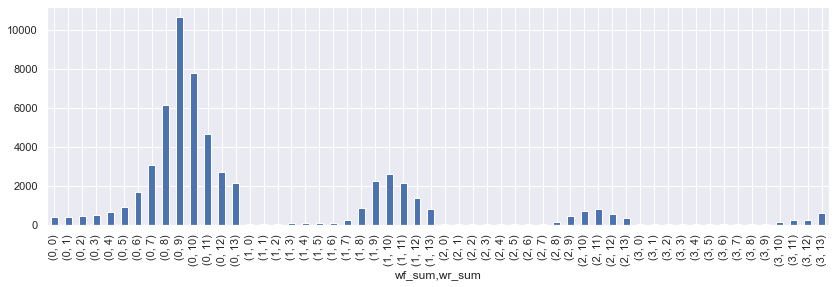

In [63]:
new_data.groupby(['wf_sum', 'wr_sum'])['education'].count().plot(kind='bar', stacked=True,
                                                                figsize=(14,4))

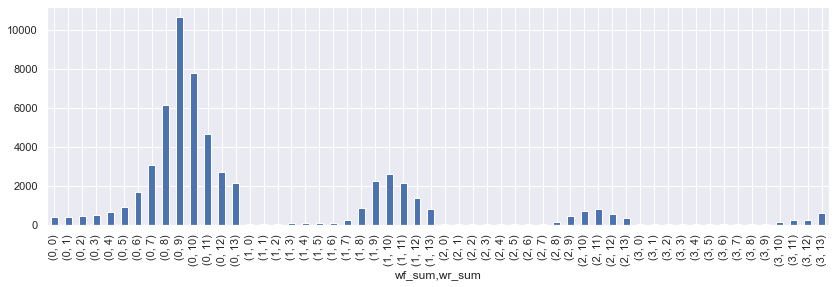

In [64]:
new_data.groupby(['wf_sum', 'wr_sum'])['engnat'].count().plot(kind='bar', stacked=True,
                                                                figsize=(14,4))

In [52]:
import style

In [71]:
corr_with=lambda x:x.corrwith(x['education'])
grouped=new_data[['education','engnat','familysize','hand','married','urban','wf_sum','wr_sum']].groupby(['wf_sum','wr_sum'])
grouped.apply(corr_with).style.background_gradient(cmap='summer')